# Life Expectancy and GDP
Written by TheJJSerg, Sug900, Fernando, and CalvinTheMechanic

This is a Codecademy Portfolio Project to use data visualization to analyze and plot data from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

We will analyze, prepare, and plot data in order to answer questions in a meaningful way. After our analysis, we will be creating a blog post to share our findings on the World Health Organization website.

## Project Objectives
- Complete a project to add to our portfolio
- Use `seaborn` and `Matplotlib` to create visualizations
- Become familiar with presenting and sharing data visualizations
- Preprocess, explore, and analyze data

## Overview of the Data
The dataset, `all_data.csv`, contains the following columns:
- **Country**: nation for a specific observation
- **Year**: the year for the observation
- **Life expectancy at birth (years)**: the life expectancy value in years
- **GDP**: Gross Domestic Product in U.S. dollars

## Method and Analysis
1. Data Loading and Tiding
2. Data Analsyis
3. Data Visualization
4. Others

1. Data Loading and Tiding

In [13]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#read csv file into a dataframe
gdp_data = pd.read_csv('all_data.csv')

#print the first 5 rows
print('HEAD OF THE DATAFRAME:')
print('======================')
display(gdp_data.head(),"\n")

#print the info of the df and main stats of the variables
print('INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:')
print('=================================================================')
print(gdp_data.info(), "\n")
print('DESCRIPTION ABOUT THE DATA:')
print('===========================')
display(gdp_data.describe(include='all'), "\n")
#reduce life expectancy variable name

gdp_data.rename(columns={'Life expectancy at birth (years)': 'Life'}, inplace=True)
print('DATAFRAME RENAMED:')
print('===========================')
display(gdp_data.head())

HEAD OF THE DATAFRAME:


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


'\n'

INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None 

DESCRIPTION ABOUT THE DATA:


,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


'\n'

DATAFRAME RENAMED:


,Country,Year,Life,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


* The data contains 96 entries with no null values
* The data types are correct as the `Country` variable is a string while the `Life expectancy at birth (years)` and `GDP` are float. The `Year` variable is an integer
* The data shows no issues with missing data or wrong entries 
* The `Life expectancy at birth (years)` variable was renamed to `Life`
* The GDP and Life Expectancy variables do not have the same magnitudes and scales (some countries have higher GDP orders of magnitude compared to others)
* To analyze the behavior without taking into account the magnitudes, two new variables are created, `GDP_Inc` and `Life_Inc` which show the relative change of both indicators based on the year 2000 (initial value). This allows to compare both variables for all countries in the same plot  

In [17]:
# Apply the lambda function to calculate GDP_Inc
GDP_Inc = gdp_data.groupby('Country')['GDP'].apply(lambda x: (x - x.iloc[0]) / x.iloc[0])
# reset the index
GDP_Inc = GDP_Inc.reset_index()
# merge the gdp inc to the dataframe
gdp_data['GDP_Inc'] = GDP_Inc['GDP']

#Apply the lambda function to calculate Life_Inc
Life_Inc = gdp_data.groupby('Country')['Life'].apply(lambda x: (x - x.iloc[0]) / x.iloc[0])
# reset the index
Life_Inc = Life_Inc.reset_index()
# merge the life inc to the dataframe
gdp_data['Life_Inc'] = Life_Inc['Life']
display(gdp_data.head())

,Country,Year,Life,GDP,GDP_Inc,Life_Inc
0,Chile,2000,77.3,7.786093e+10,0.000000,0.000000
1,Chile,2001,77.3,7.097992e+10,-0.088376,0.000000
2,Chile,2002,77.8,6.973681e+10,-0.104341,0.006468
3,Chile,2003,77.9,7.564346e+10,-0.028480,0.007762
4,Chile,2004,78.0,9.921039e+10,0.274200,0.009056


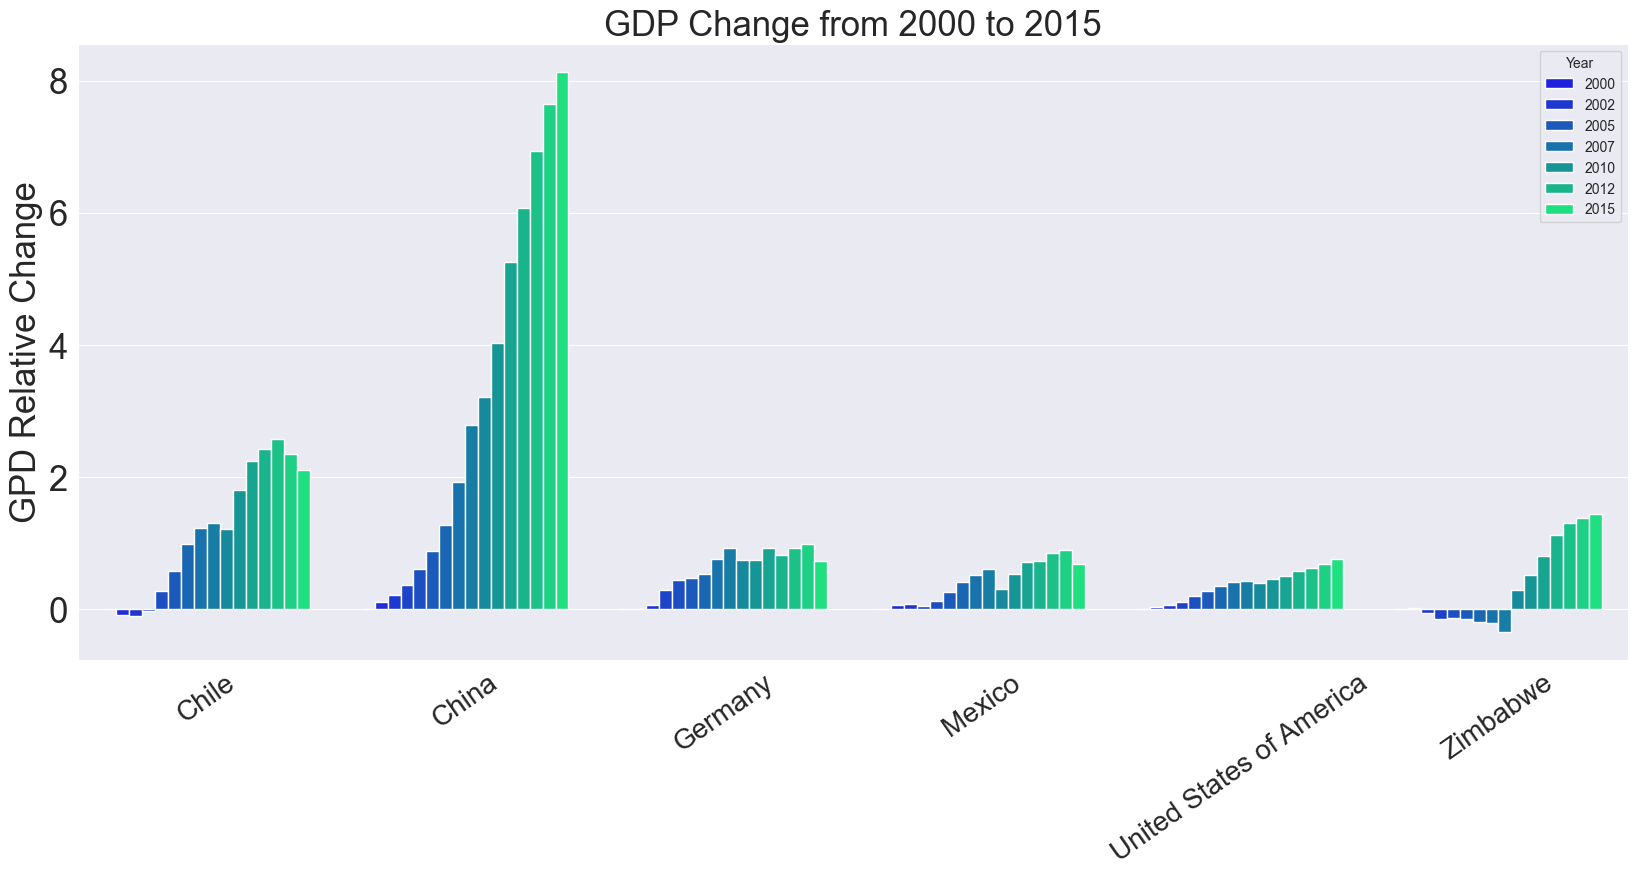

<Figure size 640x480 with 0 Axes>

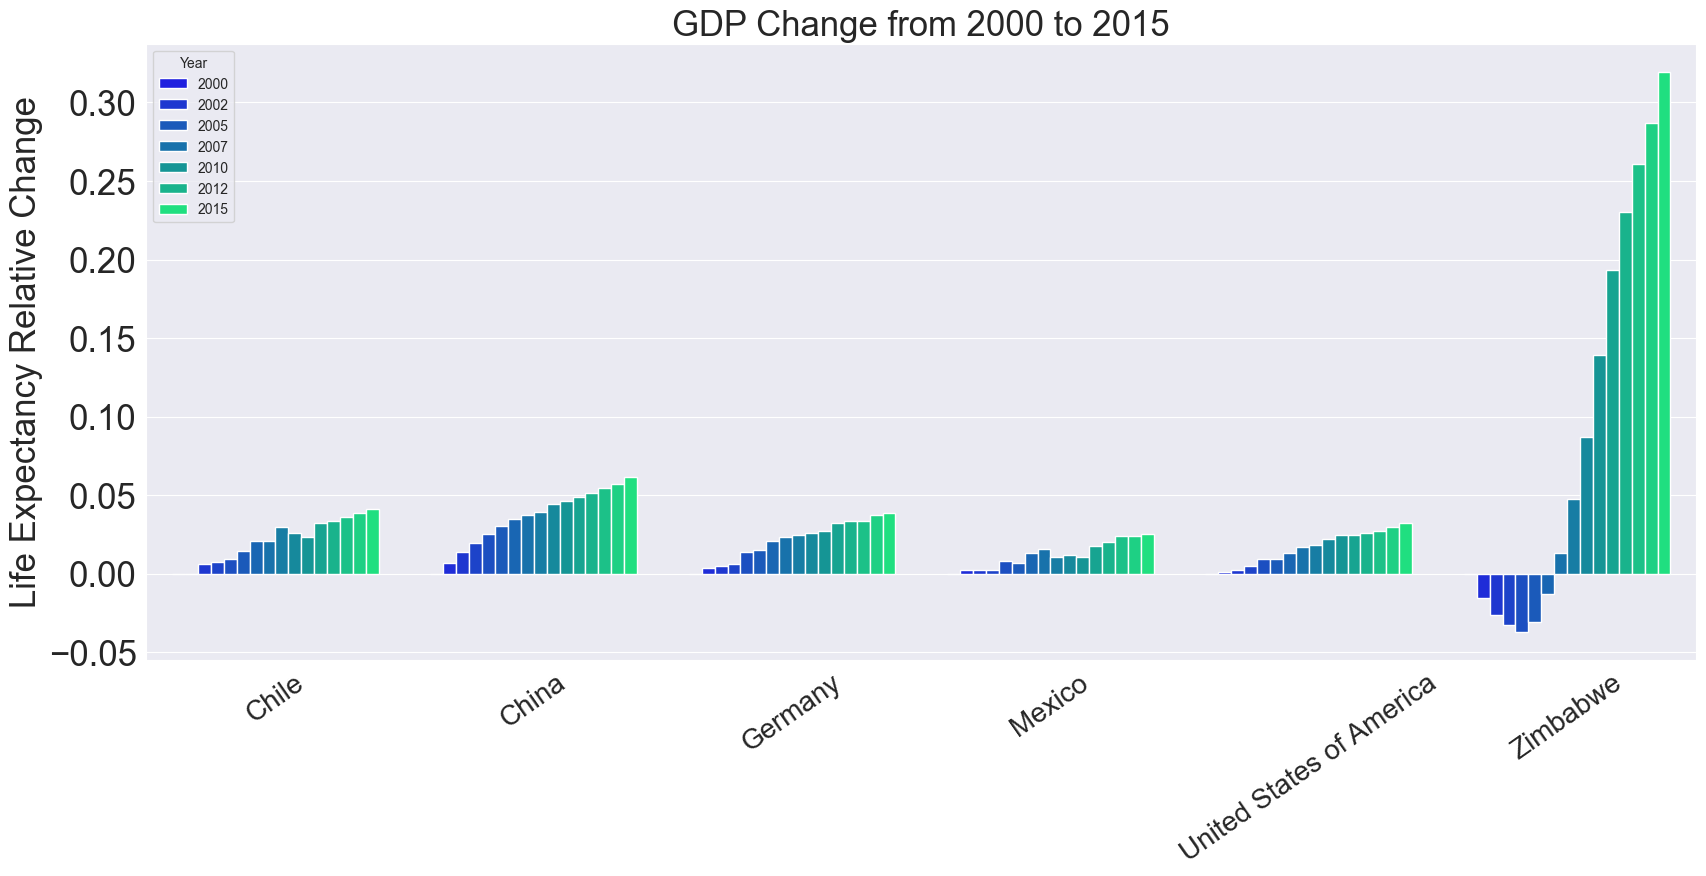

<Figure size 640x480 with 0 Axes>

In [21]:
sn.set_style('darkgrid')
#histogram of gdp_inc over the years
plt.figure(figsize=(20,8))
sn.barplot(data=gdp_data, x='Country', y='GDP_Inc', hue='Year', palette='winter')
plt.xlabel(None)
plt.title('GDP Change from 2000 to 2015', fontsize=25)
plt.ylabel("GPD Relative Change", fontsize=25)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(fontsize=25)
plt.show()
plt.clf()
#histogram of life_inc over the years
plt.figure(figsize=(20,8))
sn.barplot(data=gdp_data, x='Country', y='Life_Inc', hue='Year', palette='winter')
plt.xlabel(None)
plt.title('GDP Change from 2000 to 2015', fontsize=25)
plt.ylabel("Life Expectancy Relative Change", fontsize=25)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(fontsize=25)
plt.show()
plt.clf()